# Basic Graphics

In [1]:
%matplotlib inline

## Using `matplotlib`

`matplotlib` is quite a low-level library, but most of the other Python graphics libraries are built on top of it, so it is useful to know.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Displaying arrays

In [3]:
x = np.random.random((80, 80, 3))

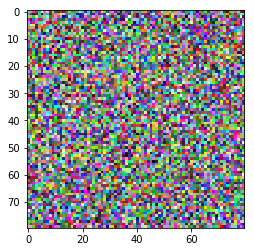

In [4]:
plt.imshow(x)
pass

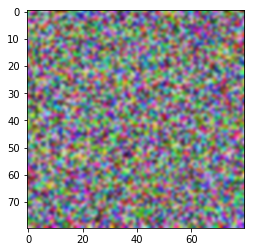

In [5]:
plt.imshow(x, interpolation='bicubic')
pass

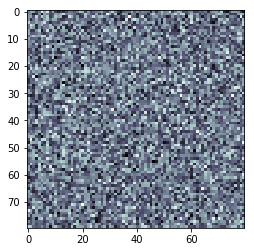

In [6]:
plt.imshow(x.mean(axis=-1), cmap='bone')
pass

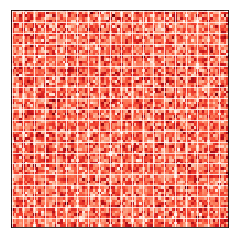

In [7]:
plt.imshow(x.mean(axis=-1), cmap='Reds')
plt.xticks(range(0, x.shape[1], 4))
plt.yticks(range(0, x.shape[0], 4))
plt.grid(color='white')
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
pass

### Line plots

In [8]:
import scipy.stats as stats

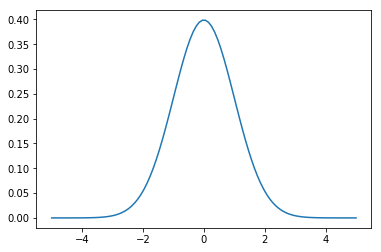

In [9]:
x = np.linspace(-5, 5, 100)
y = stats.norm().pdf(x)
plt.plot(x, y)
pass

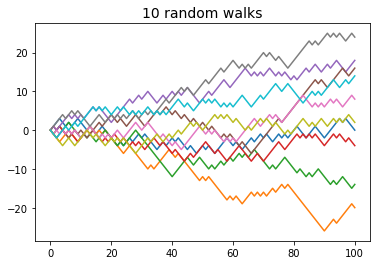

In [10]:
xs = np.c_[np.zeros(10), np.random.choice([-1,1], (10, 100)).cumsum(axis=1)]
plt.plot(xs.T)
plt.title('10 random walks', fontsize=14)
pass

### Scatter plots

In [11]:
xs = np.random.multivariate_normal([0,0], np.array([[1,0.5],[0.5, 1]]), 100)

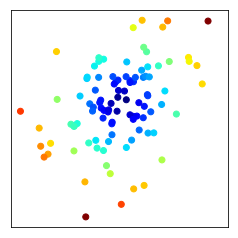

In [12]:
d = np.linalg.norm(xs, ord=2, axis=1)
plt.scatter(xs[:, 0], xs[:, 1], c=d, cmap='jet')
plt.axis('square')
plt.xticks([])
plt.yticks([])
pass

### Contour plots

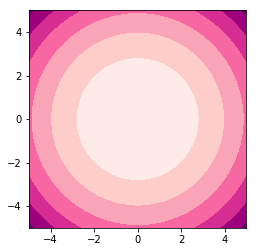

In [13]:
x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contourf(X, Y, Z, cmap=plt.cm.RdPu)
plt.axis('square')
pass

### Histograms

In [14]:
xs = [np.random.normal(mu, 0.5, (100)) for mu in range(5)]

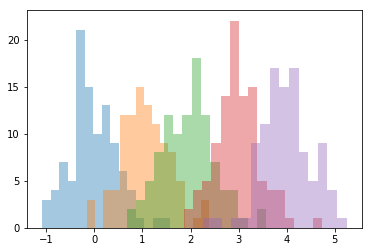

In [15]:
for x in xs:
    plt.hist(x, bins=15, alpha=0.4)

### Overlaying a density function

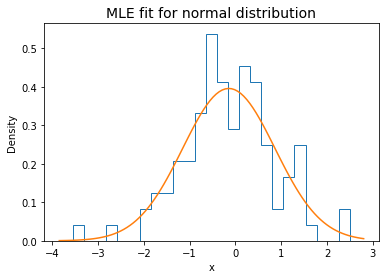

In [16]:
x = np.random.randn(100)
plt.hist(x, bins=25, histtype='step', normed=True)
mu, sigma = stats.norm.fit(x)
xp = np.linspace(*plt.xlim(), 100)
plt.plot(xp, stats.norm(mu, sigma).pdf(xp))
plt.xlabel('x')
plt.ylabel('Density')
plt.title('MLE fit for normal distribution', fontsize=14)
pass

### Styles

In [17]:
plt.style.available

['seaborn-colorblind',
 'seaborn-talk',
 'seaborn-notebook',
 'Solarize_Light2',
 'seaborn-pastel',
 '_classic_test',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-white',
 'seaborn-dark',
 'bmh',
 'seaborn-whitegrid',
 'ggplot',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-deep',
 'classic',
 'dark_background',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn',
 'fast',
 'grayscale']

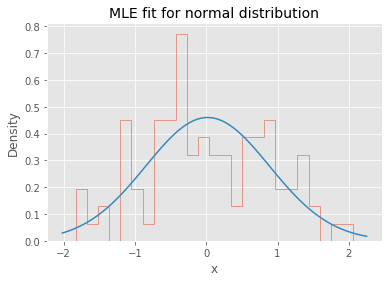

In [18]:
with plt.style.context('ggplot'):
    x = np.random.randn(100)
    plt.hist(x, bins=25, histtype='step', normed=True)
    mu, sigma = stats.norm.fit(x)
    xp = np.linspace(*plt.xlim(), 100)
    plt.plot(xp, stats.norm(mu, sigma).pdf(xp))
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title('MLE fit for normal distribution', fontsize=14)

If you intend to teach statistics to elementary school children ...

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


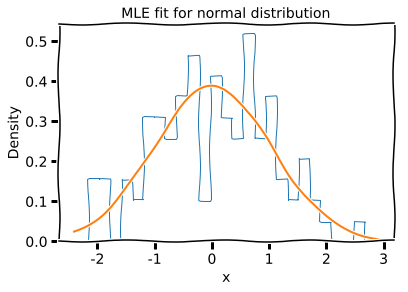

In [19]:
with plt.xkcd():
    x = np.random.randn(100)
    plt.hist(x, bins=25, histtype='step', normed=True)
    mu, sigma = stats.norm.fit(x)
    xp = np.linspace(*plt.xlim(), 100)
    plt.plot(xp, stats.norm(mu, sigma).pdf(xp))
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.title('MLE fit for normal distribution', fontsize=14)

### Multiple plots

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


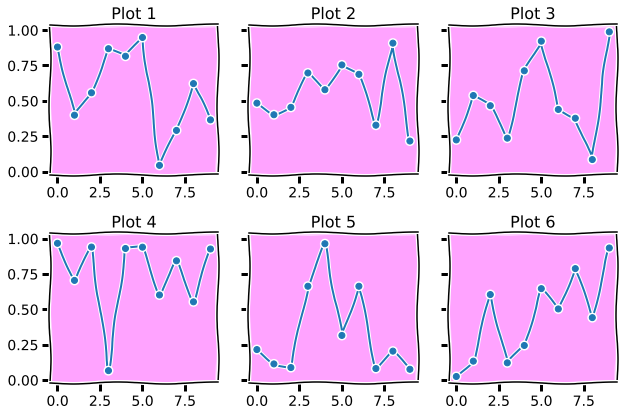

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(9,6), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.plot(np.random.rand(10), '-o')
    ax.set_title('Plot %d' % i, fontsize=16)
    ax.set_facecolor((1,0,1,0.2))
plt.tight_layout()